In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read and Examine data 

In [234]:
data=pd.read_csv('anime.csv')
data.head()
dcopy=data.copy()
dcopy=dcopy.set_index('anime_id')

In [99]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


<Axes: xlabel='rating', ylabel='Density'>

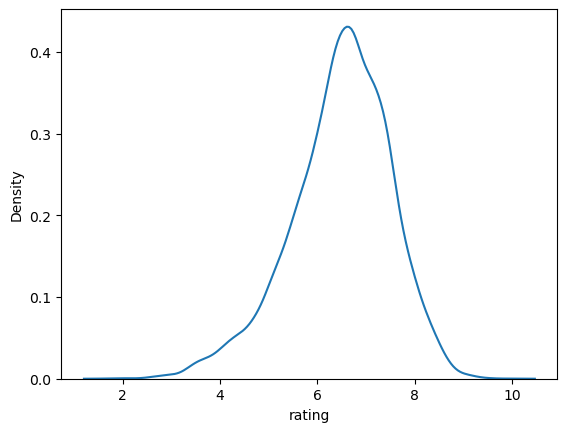

In [100]:
sns.kdeplot(data['rating'])

#### Rating is fairly Normally Distributed

<Axes: xlabel='members', ylabel='Density'>

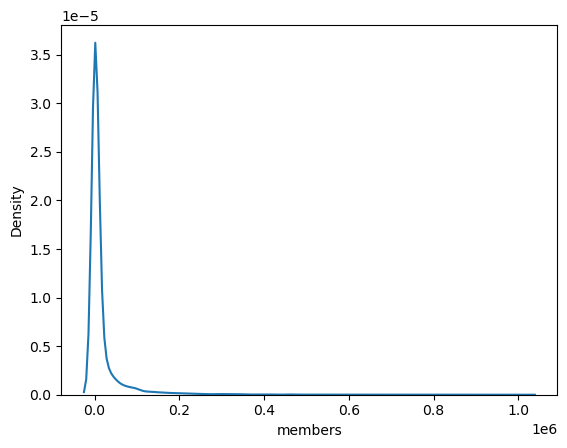

In [101]:
sns.kdeplot(data['members'])

#### Members data is right skewed

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [103]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [104]:
data.shape

(12294, 7)

In [105]:
data.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [106]:
data.drop_duplicates()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [107]:
data.drop(['type','episodes'],axis=1,inplace=True)

In [110]:
movie_dict=data[['anime_id','name']]
movie_dict = movie_dict.set_index('anime_id')
movie_dict

,name
anime_id,
32281,Kimi no Na wa.
5114,Fullmetal Alchemist: Brotherhood
28977,Gintama°
9253,Steins;Gate
9969,Gintama&#039;
...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami
5543,Under World
5621,Violence Gekiga David no Hoshi


In [13]:
data.drop(['name','members'],axis=1,inplace=True)
data

,anime_id,genre,rating
0,32281,"Drama, Romance, School, Supernatural",9.37
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",9.25
3,9253,"Sci-Fi, Thriller",9.17
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",9.16
...,...,...,...
12289,9316,Hentai,4.15
12290,5543,Hentai,4.28
12291,5621,Hentai,4.88
12292,6133,Hentai,4.98


### Data Imputation

There are null values in genre,type and rating

Lets Use mean for `rating` and mode for `genre` and `type`

In [14]:
rating_mean=data['rating'].mean()
rating_mean

6.473901690981432

In [15]:
genre_mode=data['genre'].mode()[0]
genre_mode

'Hentai'

In [16]:
data.fillna(
    {
        'genre':genre_mode,
        'rating':rating_mean,
    },inplace=True
)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   genre     12294 non-null  object 
 2   rating    12294 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 288.3+ KB


#### Null items have been curated

In [18]:
data.head()

,anime_id,genre,rating
0,32281,"Drama, Romance, School, Supernatural",9.37
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",9.25
3,9253,"Sci-Fi, Thriller",9.17
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",9.16


In [19]:
data['genre_list'] = data['genre'].str.split(', ')
data

,anime_id,genre,rating,genre_list
0,32281,"Drama, Romance, School, Supernatural",9.37,"[Drama, Romance, School, Supernatural]"
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,"Sci-Fi, Thriller",9.17,"[Sci-Fi, Thriller]"
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...
12289,9316,Hentai,4.15,[Hentai]
12290,5543,Hentai,4.28,[Hentai]
12291,5621,Hentai,4.88,[Hentai]
12292,6133,Hentai,4.98,[Hentai]


In [20]:
genres=sorted(set(genre for genre_list in data['genre_list'] for genre in genre_list))
genres

['Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri']

In [21]:
for genre in genres:
    data[genre]=data['genre_list'].apply(lambda x:int(genre in x))

In [22]:
data

,anime_id,genre,rating,genre_list,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,"Drama, Romance, School, Supernatural",9.37,"[Drama, Romance, School, Supernatural]",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,"[Action, Comedy, Historical, Parody, Samurai, ...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,"Sci-Fi, Thriller",9.17,"[Sci-Fi, Thriller]",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,"[Action, Comedy, Historical, Parody, Samurai, ...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Hentai,4.15,[Hentai],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Hentai,4.28,[Hentai],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Hentai,4.88,[Hentai],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Hentai,4.98,[Hentai],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data.drop(['genre_list','genre'],axis=1,inplace=True)

In [24]:
data

,anime_id,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,9.37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,9.26,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,9.25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,9.17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,9.16,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,4.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,4.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,4.88,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,4.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Recommendation Based on Genre

In [25]:
genres=data.drop(['anime_id','rating'],axis=1)

In [26]:
genres

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(genres)
cosine_sim

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

### Item Similarity Matrix

In [28]:
anime_sim_df=pd.DataFrame(cosine_sim,index=data['anime_id'],columns=data['anime_id'])
anime_sim_df

anime_id,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Recommend Anime

In [237]:

def reccommend_anime(title):
    
    if title.lower() in movie_dict['name'].str.lower().values:
        
        title_given=movie_dict.loc[movie_dict['name'].str.lower()==title.lower()]
        id=title_given.index[0]
        similar_anime=anime_sim_df.loc[id.squeeze()].sort_values(ascending=False)[1:9].index
        recommneded_index=similar_anime.tolist()
        print('--------------------THE RECOMMENDED ANIME ARE-----------------------------------')
        recomm_anime=pd.DataFrame(dcopy.loc[recommneded_index])
        return recomm_anime
    else:
        print("Anime Not in Dataset")

In [238]:
title=input("Enter the Anime:")
anime=reccommend_anime(title)
anime

Enter the Anime: Gravitation


--------------------THE RECOMMENDED ANIME ARE-----------------------------------


,name,genre,type,episodes,rating,members
anime_id,,,,,,
507,Gravitation: Lyrics of Love,"Comedy, Romance, Shoujo, Shounen Ai",OVA,2,7.12,22015
12663,Patalliro! Stardust Keikaku,"Adventure, Comedy, Romance, Shoujo, Shounen Ai",Movie,1,6.80,373
2835,Patalliro!,"Adventure, Comedy, Romance, Shoujo, Shounen Ai",TV,49,7.63,2409
31178,Uta no☆Prince-sama♪ Maji Love Legend Star,"Comedy, Harem, Music, Romance, Shoujo",TV,13,7.37,12757
4021,Seiyou Kottou Yougashiten: Antique,"Comedy, Shoujo, Shounen Ai",TV,12,7.16,21937
2034,Lovely★Complex,"Comedy, Romance, Shoujo",TV,24,8.23,235003
28297,Ore Monogatari!!,"Comedy, Romance, Shoujo",TV,24,8.11,200833
33203,Fukumenkei Noise,"Music, Romance, Shoujo",TV,Unknown,NaN,2127


### Split Data

In [244]:
from sklearn.model_selection import train_test_split
data["genre_list"] = data["genre"].fillna("").apply(lambda x: [g.strip() for g in x.split(",")])

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_row


anime_id                                   33933
name          Yasamura Yasashi no Yasashii Sekai
genre                                     Comedy
type                                          TV
episodes                                      17
rating                                      4.44
members                                      369
genre_list                              [Comedy]
Name: 9757, dtype: object

### Evaluate Recommendations

In [253]:
precisions, recalls, f1s = [], [], []


def reccommend_anime_train(title):
    
    if title.lower() in movie_dict['name'].str.lower().values:
        
        title_given=movie_dict.loc[movie_dict['name'].str.lower()==title.lower()]
        id=title_given.index[0]
        similar_anime=anime_sim_df.loc[id.squeeze()].sort_values(ascending=False)[1:9].index
        recommneded_index=similar_anime.tolist()
        recomm_anime=pd.DataFrame(data.loc[recommneded_index])
        return recomm_anime
    else:
        print("Anime Not in Dataset")

for _, train_row in train_df.sample(n=200, random_state=42).iterrows():
    true_genres = set(train_row['genre_list'])
    recs = reccommend_anime_train(train_row["name"])
    if not isinstance(recs, pd.DataFrame) or recs.empty:
        continue
    predicted_genres = set()
    for genres in recs["genre_list"]:
        predicted_genres.update(genres)
    tp = len(true_genres & predicted_genres)
    fp = len(predicted_genres - true_genres)
    fn = len(true_genres - predicted_genres)
    precision = tp / (tp + fp) 
    recall = tp / (tp + fn)  
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

np.mean(precisions), np.mean(recalls), np.mean(f1s)


(0.8444063436563437, 0.9927380952380952, 0.8)

### Interpretation
The recommendation system shows excellent performance with a recall of 0.993, meaning it successfully retrieves nearly all relevant items. Precision is also high at 0.844, indicating most recommendations are accurate. The F1-score of 0.800 reflects good overall balance. 


### Interview Questions

##### 1. Can you explain the difference between user-based and item-based collaborative filtering?

User-based collaborative filtering recommends items to a user by finding other users with similar preferences. It compares user behavior to identify a group of similar users, then suggests items that those users liked but the target user hasn't seen. In contrast, item-based collaborative filtering focuses on the relationships between items. It recommends items similar to those the user has already liked or interacted with by comparing item rating patterns across all users. Item-based methods are often more stable and scalable than user-based filtering, especially when the number of users is large.


##### 2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation technique that predicts a user's interests by analyzing preferences of similar users or items, without needing item content. It works by constructing a user–item interaction matrix and using similarity measures like cosine correlation. In user-based filtering, the system finds users similar to the target user and recommends items they liked. In item-based filtering, it finds items similar to what the user liked before. Collaborative filtering is effective but struggles with cold start (new users/items) and sparsity (few ratings) problems without sufficient interaction data.
